In [1]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import copy
np.random.seed(0)

In [2]:
###### part (a) Iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')

train_acc: 98.66666666666667%, test_acc: 96.0%


[Text(133.92000000000002, 190.26, 'X[3] <= 0.75\ngini = 0.659\nsamples = 75\nvalue = [29, 20, 26]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[2] <= 5.05\ngini = 0.491\nsamples = 46\nvalue = [0, 20, 26]'),
 Text(133.92000000000002, 81.53999999999999, 'X[3] <= 1.75\ngini = 0.165\nsamples = 22\nvalue = [0, 20, 2]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

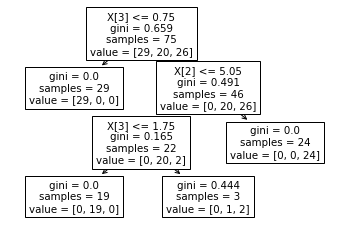

In [3]:
tree.plot_tree(clf)

In [4]:
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train accuracy mean: 77.52%, stdev: 23.731101018611756%
test accuracy mean: 68.88%, stdev: 26.658145305161632%


In [2]:
###### part (b) 75-25 split #########
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train_acc: 98.21428571428571%, test_acc: 97.36842105263158%
train accuracy mean: 78.58035714285715%, stdev: 26.25622344836378%
test accuracy mean: 75.52631578947368%, stdev: 25.594050122285253%


In [4]:
###### part (c) entropy criteria #########
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, random_state=0)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train_acc: 98.21428571428571%, test_acc: 97.36842105263158%
train accuracy mean: 78.58035714285715%, stdev: 26.25622344836378%
test accuracy mean: 75.52631578947368%, stdev: 25.594050122285253%


[Text(209.25, 285.39000000000004, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(139.5, 203.85000000000002, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(279.0, 203.85000000000002, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(139.5, 122.31, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(69.75, 40.76999999999998, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 40.76999999999998, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(418.5, 122.31, 'X[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(348.75, 40.76999999999998, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(488.25, 40.76999999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

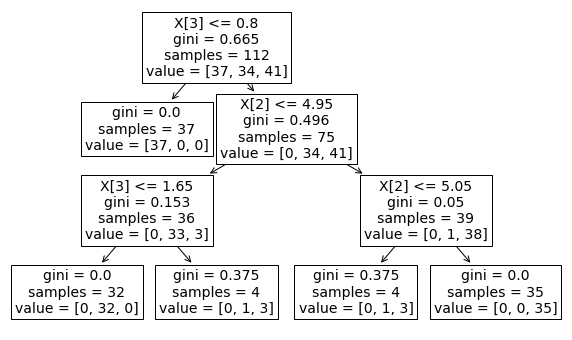

In [5]:
###### part (d) visualize a few trees #########
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)
clf = clf.fit(X_train, Y_train)
plt.figure(figsize=(10,6))
tree.plot_tree(clf, fontsize=14)

[Text(223.2, 293.54400000000004, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(167.39999999999998, 228.312, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(279.0, 228.312, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(111.6, 163.08000000000004, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(55.8, 97.84800000000001, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(167.39999999999998, 97.84800000000001, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(111.6, 32.61600000000004, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(223.2, 32.61600000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 163.08000000000004, 'X[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(390.59999999999997, 97.84800000000001, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(334.79999999999995, 32.61600000000004, 'gini = 0.0\nsamples = 3\nvalue = [

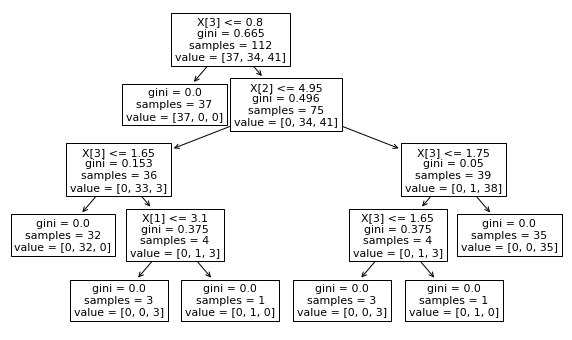

In [8]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0)
clf = clf.fit(X_train, Y_train)
plt.figure(figsize=(10,6))
tree.plot_tree(clf, fontsize=11)

[Text(223.2, 293.54400000000004, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(167.39999999999998, 228.312, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(279.0, 228.312, 'X[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(111.6, 163.08000000000004, 'X[3] <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(55.8, 97.84800000000001, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(167.39999999999998, 97.84800000000001, 'X[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(111.6, 32.61600000000004, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(223.2, 32.61600000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 163.08000000000004, 'X[3] <= 1.75\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(390.59999999999997, 97.84800000000001, 'X[3] <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(334.79999999999995, 32.61600000000004, 'ent

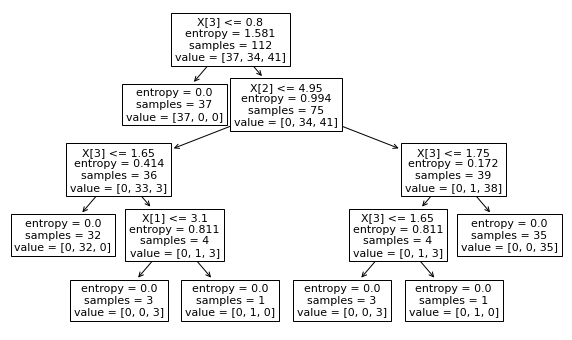

In [9]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)
clf = clf.fit(X_train, Y_train)
plt.figure(figsize=(10,6))
tree.plot_tree(clf, fontsize=11)

In [15]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
